In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Load and scale the data
data = pd.read_excel('VL_for_Clustering.xlsx')
X = data.iloc[:, 2:5].values
#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X)

In [12]:
X.shape

(262, 3)

## Agglomerative Clustering


In [14]:
import pandas as pd
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [43]:
#try different clusters

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist
import pandas as pd

# Initialize lists to store results
n_clusters_range = range(2, 11)  # Range of cluster numbers to test, e.g., from 2 to 10
silhouette_scores = []
davies_bouldin_indices = []
cophenetic_corrs = []

# Linkage matrix for cophenetic correlation (only need to calculate once)
Z = linkage(X, method='ward')

# Loop over different numbers of clusters
for n_clusters in n_clusters_range:
    # Perform Agglomerative Clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = clustering.fit_predict(X)

    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(X, labels)
    davies_bouldin_indices.append(db_index)

    # Calculate Cophenetic Correlation Coefficient (remains constant for a linkage)
    c, _ = cophenet(Z, pdist(X))
    cophenetic_corrs.append(c)

    # Print the scores for each number of clusters
    print(f"\nFor n_clusters = {n_clusters}:")
    print(f"  Silhouette Score: {silhouette_avg}")
    print(f"  Davies-Bouldin Index: {db_index}")
    print(f"  Cophenetic Correlation Coefficient: {c}")

# Create a DataFrame to summarize the results
results_df = pd.DataFrame({
    'n_clusters': list(n_clusters_range),
    'Silhouette Score': silhouette_scores,
    'Davies-Bouldin Index': davies_bouldin_indices,
    'Cophenetic Correlation': cophenetic_corrs
})

# Display the results for comparison
print("\nSummary of clustering metrics for different numbers of clusters:")
print(results_df)



For n_clusters = 2:
  Silhouette Score: 0.33012993773192634
  Davies-Bouldin Index: 1.2359681540271426
  Cophenetic Correlation Coefficient: 0.592780703617755

For n_clusters = 3:
  Silhouette Score: 0.31612863490949344
  Davies-Bouldin Index: 0.992856053847403
  Cophenetic Correlation Coefficient: 0.592780703617755

For n_clusters = 4:
  Silhouette Score: 0.31849033231319995
  Davies-Bouldin Index: 1.058811042137405
  Cophenetic Correlation Coefficient: 0.592780703617755

For n_clusters = 5:
  Silhouette Score: 0.3482690074718589
  Davies-Bouldin Index: 0.9403475850188846
  Cophenetic Correlation Coefficient: 0.592780703617755

For n_clusters = 6:
  Silhouette Score: 0.2950420342640146
  Davies-Bouldin Index: 1.0543284532627977
  Cophenetic Correlation Coefficient: 0.592780703617755

For n_clusters = 7:
  Silhouette Score: 0.31094176651767086
  Davies-Bouldin Index: 1.0495699705683037
  Cophenetic Correlation Coefficient: 0.592780703617755

For n_clusters = 8:
  Silhouette Score: 0.3

In [64]:
clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels = clustering.fit_predict(X)

In [65]:
import scipy.cluster.hierarchy as shc
import numpy as np

linkage_matrix = shc.linkage(X, method='ward')

# The linkage matrix format is: [cluster1, cluster2, distance, sample_count]
print("Linkage matrix (last few merges):")
print(linkage_matrix[-10:, :])


Linkage matrix (last few merges):
[[499.         504.           0.92891056  52.        ]
 [492.         500.           1.1453424   46.        ]
 [506.         510.           1.17085261  62.        ]
 [505.         509.           1.2120701   33.        ]
 [511.         512.           1.47093138  51.        ]
 [513.         515.           1.6142582  114.        ]
 [507.         518.           2.61035135 132.        ]
 [516.         517.           2.73236079  84.        ]
 [514.         519.           3.58104767 178.        ]
 [520.         521.           4.73427815 262.        ]]


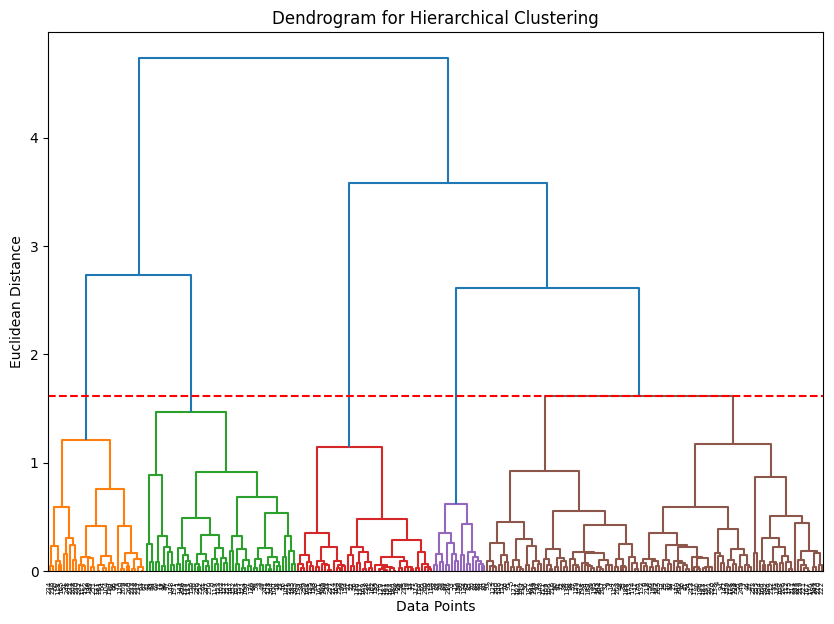

In [66]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering")

# Set the color_threshold to control the cut-off height
color_threshold = 1.6142582
dendrogram = shc.dendrogram(shc.linkage(X, method='ward'), color_threshold=color_threshold)

plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.axhline(y=color_threshold, color='r', linestyle='--')
plt.show()

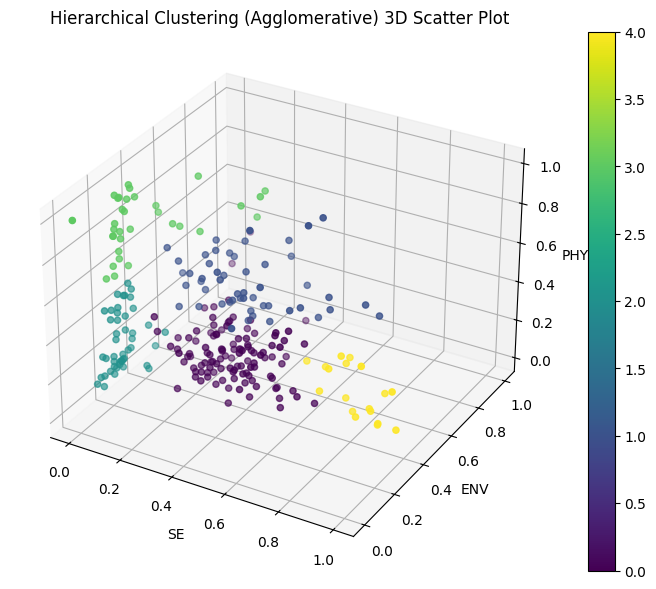

In [67]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#3d plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

#pl]ot the data points with cluster labels as color
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis')

#set labels and title
ax.set_title("Hierarchical Clustering (Agglomerative) 3D Scatter Plot")
ax.set_xlabel("SE")
ax.set_ylabel("ENV")
ax.set_zlabel("PHY")

#color bar for clusters
plt.colorbar(sc)
plt.show()

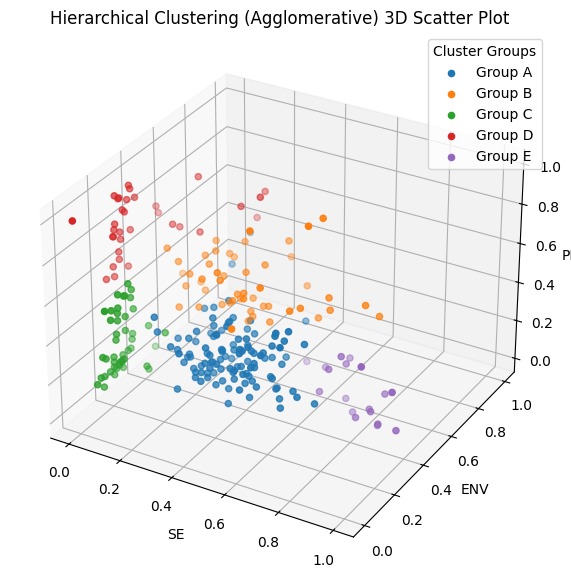

In [68]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

#3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

#define cluster names
cluster_names = {0: 'Group A', 1: 'Group B', 2: 'Group C', 3: 'Group D', 4: 'Group E'}

#plot the data points with cluster labels as color
for cluster in range(5):  # Loop through each cluster
    #indices of data points that belong to this cluster
    cluster_points = X[labels == cluster]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=cluster_names[cluster])

#set labels and title
ax.set_title("Hierarchical Clustering (Agglomerative) 3D Scatter Plot")
ax.set_xlabel("SE")
ax.set_ylabel("ENV")
ax.set_zlabel("PHY")

#color bar for clusters
plt.colorbar(sc)

#legend
ax.legend(title="Cluster Groups")

plt.show()


In [69]:
#cluster labels to the data
data['Cluster'] = labels

#select only numeric columns for aggregation
numeric_columns = data.select_dtypes(include=[np.number]).columns

#calculate the centroids (mean) for each cluster, considering only numeric columns
centroids = data.groupby('Cluster')[numeric_columns].mean()

#display the centroids
print("Centroids of each cluster:")
print(centroids)


Centroids of each cluster:
               SE       ENV       PHY  Cluster
Cluster                                       
0        0.346352  0.406949  0.191482      0.0
1        0.374664  0.458767  0.534171      1.0
2        0.007074  0.251836  0.230487      2.0
3        0.056260  0.341085  0.800784      3.0
4        0.814489  0.404719  0.193683      4.0


In [70]:
import pandas as pd

#full output is printed without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

#descriptive statistics for each cluster
cluster_stats = data.groupby('Cluster')[numeric_columns].agg(['mean', 'std', 'min', 'max'])

print("Descriptive statistics for each cluster:")
print(cluster_stats)

#reset option
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
pd.reset_option('display.width')


Descriptive statistics for each cluster:
               SE                                     ENV                                     PHY  \
             mean       std       min       max      mean       std       min       max      mean   
Cluster                                                                                             
0        0.346352  0.128678  0.063370  0.661406  0.406949  0.111770  0.213875  1.000000  0.191482   
1        0.374664  0.177847  0.069374  0.825460  0.458767  0.096591  0.167789  0.716937  0.534171   
2        0.007074  0.022807  0.000000  0.109490  0.251836  0.067532  0.107246  0.418773  0.230487   
3        0.056260  0.112289  0.000000  0.381667  0.341085  0.144883  0.000000  0.676631  0.800784   
4        0.814489  0.113264  0.580897  1.000000  0.404719  0.057658  0.313354  0.503750  0.193683   

                                      Cluster               
              std       min       max    mean  std min max  
Cluster                     

In [53]:
import pandas as pd

# Define the cluster names
cluster_names = {0: 'Group A', 1: 'Group B', 2: 'Group C', 3: 'Group D', 4: 'Group E'}

# Assume `data` is your original DataFrame and `labels` is the clustering result
data['Cluster'] = labels  # Add numeric labels
data['Cluster_Name_hc'] = data['Cluster'].map(cluster_names)  # Map to cluster names

# Display the first few rows to confirm
print(data.head())


  nta2020             ntaname        SE       ENV       PHY  Cluster  \
0  BK0101          Greenpoint  0.090177  0.414559  0.634958        1   
1  BK0102        Williamsburg  0.229050  0.385575  0.406091        1   
2  BK0103  South Williamsburg  0.579593  0.373571  0.426044        0   
3  BK0104   East Williamsburg  0.316466  0.507422  0.401270        1   
4  BK0201    Brooklyn Heights  0.120672  0.278005  0.384234        0   

  Cluster_Name_hc  
0         Group B  
1         Group B  
2         Group A  
3         Group B  
4         Group A  


In [55]:
data.to_excel('Clustering_result.xlsx')

In [75]:
data['Cluster_Name_hc'].value_counts()

,count
Cluster_Name_hc,
Group A,114
Group B,51
Group C,46
Group D,33
Group E,18
